#### **`Logit Transformation:`**

In [8]:
import pandas as pd
import numpy as np
from scipy.special import logit 

In [14]:
df=pd.read_csv("2022 MLB Player Stats - Batting.csv",encoding='latin1',sep=';')

In [15]:
df.head()

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
0,1,CJ Abrams*,21,TOT,NL,90,302,284,33,70,...,0.280,0.324,0.604,76,92,5,9,2,2,0
1,2,CJ Abrams*,21,SDP,NL,46,139,125,16,29,...,0.285,0.320,0.605,77,40,4,6,2,2,0
2,3,CJ Abrams*,21,WSN,NL,44,163,159,17,41,...,0.276,0.327,0.603,75,52,1,3,0,0,0
3,4,Albert Abreu,26,TOT,AL,1,0,0,0,0,...,0.000,0.000,0.000,0,0,0,0,0,0,0
4,5,Albert Abreu,26,KCR,AL,1,0,0,0,0,...,0.000,0.000,0.000,0,0,0,0,0,0,0


In [33]:
df["BA"].max(), df["BA"].min()

(0.75, 0.0)

<Axes: >

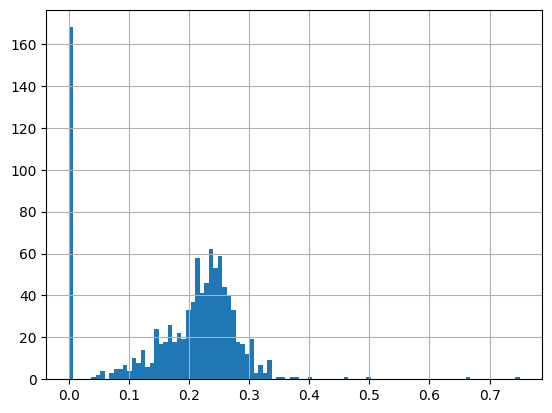

In [16]:
df["BA"].hist(bins=100)

In [25]:
df["BA-logited"]=df["BA"].apply(lambda x: logit(x))

In [29]:
import seaborn as sns

#### I had here some -inf values so I could not draw a hist using Pandas So I did it using seaborn

<Axes: xlabel='BA-logited', ylabel='Count'>

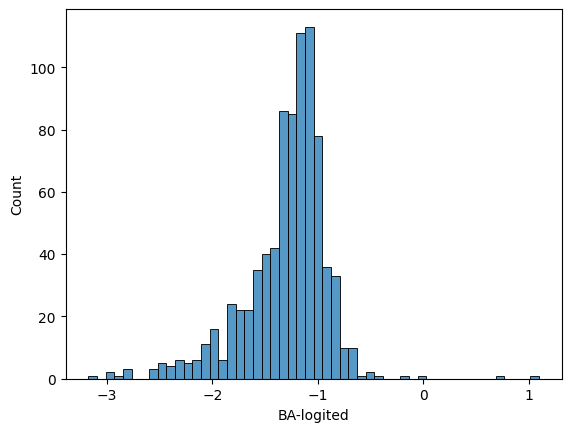

In [30]:
sns.histplot(df["BA-logited"])

In [31]:
# Lets solve the -inf problem:
# Lets Use MinMaxScaler

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler=MinMaxScaler(feature_range=(0.001,0.999 ))
df["BA_Scaled"]=scaler.fit_transform(df[["BA"]])
###### Dont Forge [[]]

In [38]:
df["BA_Scaled"]=logit(df["BA_Scaled"])

<Axes: >

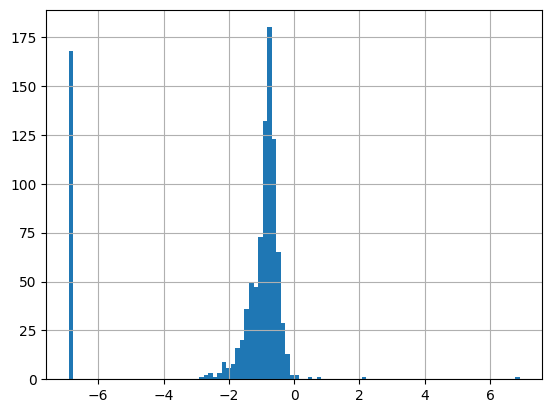

In [39]:
df["BA_Scaled"].hist(bins=100)

#### **Potentzen von Features:**

In [3]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("AmesHousing.csv")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
df["Lot Area_log"]=np.log10(df["Lot Area"])

In [8]:
df["SalePrice_log"]=np.log10(df["SalePrice"])

In [12]:
df["squared_lot_area"]=df["Lot Area_log"]**2
df["cubed_lot_area"]=df["Lot Area_log"]**3

In [15]:
koko=pd.DataFrame(df[["Lot Area_log","squared_lot_area","cubed_lot_area","SalePrice_log"]])

In [16]:
koko

,Lot Area_log,squared_lot_area,cubed_lot_area,SalePrice_log
0,4.502017,20.268159,91.247601,5.332438
1,4.065281,16.526509,67.184899,5.021189
2,4.154333,17.258480,71.697467,5.235528
3,4.047664,16.383585,66.315252,5.387390
4,4.140822,17.146408,71.000228,5.278525
...,...,...,...,...
2925,3.899656,15.207320,59.303322,5.153815
2926,3.948657,15.591896,61.567054,5.117271
2927,4.018742,16.150288,64.903842,5.120574
2928,4.000434,16.003473,64.020838,5.230449


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [25]:
m1=LinearRegression()
score_m1=cross_val_score(m1,koko[["Lot Area_log"]],koko["SalePrice_log"],cv=10)
print(score_m1.mean())
score_m2=cross_val_score(m1,koko[["Lot Area_log","squared_lot_area","cubed_lot_area"]] \
                ,koko["SalePrice_log"],cv=10)
print(score_m2.mean())
# We notice after adding the square and cube of the feature the score became better

0.05382393054609513
0.0639979895327871


In [26]:
import matplotlib.pyplot as plt

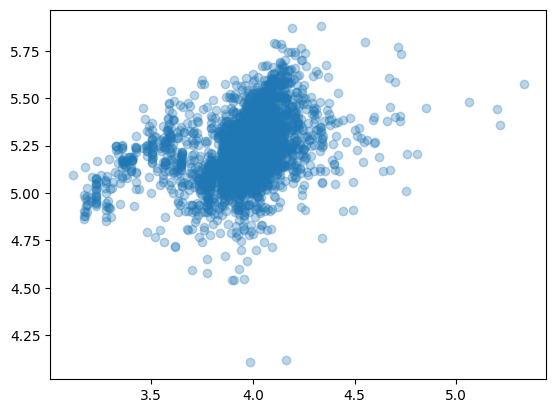

In [30]:
plt.scatter(x=df["Lot Area_log"],y=df["SalePrice_log"],alpha=0.3)